### EDA

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import joblib

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

In [2]:
rentals = pd.read_csv(r"C:\Users\tigju\Documents\Lambda School\Labs\cityspire-f-ds\notebooks\rentals\data\rentals_2010_2020.csv",encoding='utf-8')

In [3]:
print(rentals.shape)
rentals.head()

(106, 86)


RegionID                          RegionName  SizeRank  2014-01  2014-02  \
0    102001                       United States         0   1368.0     1376   
1    394913                        New York, NY         1   2329.0     2351   
2    753899  Los Angeles-Long Beach-Anaheim, CA         2   1866.0     1886   
3    394463                         Chicago, IL         3   1448.0     1461   
4    394514               Dallas-Fort Worth, TX         4   1202.0     1202   

   2014-03  2014-04  2014-05  2014-06  2014-07  2014-08  2014-09  2014-10  \
0     1379     1395     1408     1419     1428     1433     1433     1432   
1     2355     2385     2414     2434     2447     2455     2456     2455   
2     1891     1916     1939     1962     1985     1996     2003     2010   
3     1464     1482     1498     1510     1519     1521     1517     1508   
4     1207     1219     1232     1244     1251     1257     1257     1252   

   2014-11  2014-12  2015-01  2015-02  2015-03  2015-04  2015-05  2015-06  \
0     1431     1432     1437     1445     1455     1468     1478     1487   
1     2455     2452     2459     2471     2491     2520     2533     2550   
2     2016     2020     2033     2039     2056     2073     2086     2097   
3     1506     1504     1509     1515     1505     1516     1538     1555   
4     1254     1261     1261     1268     1282     1294     1303     1313   

   2015-07  2015-08  2015-09  2015-10  2015-11  2015-12  2016-01  2016-02  \
0     1493     1497     1499     1498     1500     1499     1505     1513   
1     2560     2563     2570     2570     2562     2558     2562     2565   
2     2115     2129     2143     2146     2159     2163     2176     2186   
3     1563     1570     1566     1556     1549     1549     1556     1566   
4     1318     1323     1322     1320     1324     1319     1323     1334   

   2016-03  2016-04  2016-05  2016-06  2016-07  2016-08  2016-09  2016-10  \
0     1523     1534     1543     1552     1553     1556     1556     1555   
1     2574     2601     2614     2625     2609     2622     2623     2620   
2     2200     2218     2239     2249     2254     2270     2278     2286   
3     1577     1591     1605     1615     1620     1620     1610     1599   
4     1345     1357     1369     1382     1387     1390     1389     1391   

   2016-11  2016-12  2017-01  2017-02  2017-03  2017-04  2017-05  2017-06  \
0     1554     1554     1558     1564     1572     1583     1592     1599   
1     2617     2604     2610     2612     2620     2639     2654     2663   
2     2284     2291     2297     2311     2321     2340     2354     2363   
3     1590     1586     1585     1597     1611     1624     1638     1646   
4     1391     1391     1392     1398     1409     1415     1426     1436   

   2017-07  2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  \
0     1605     1605     1597     1597     1599     1600     1605     1613   
1     2671     2665     2680     2660     2644     2637     2630     2640   
2     2376     2385     2388     2391     2390     2391     2403     2415   
3     1651     1645     1637     1623     1613     1614     1619     1629   
4     1442     1442     1440     1439     1438     1439     1442     1449   

   2018-03  2018-04  2018-05  2018-06  2018-07  2018-08  2018-09  2018-10  \
0     1623     1633     1644     1654     1659     1661     1661     1660   
1     2652     2671     2686     2701     2710     2712     2711     2700   
2     2422     2436     2444     2463     2470     2481     2488     2498   
3     1640     1651     1665     1676     1680     1678     1668     1656   
4     1455     1462     1469     1481     1485     1483     1482     1484   

   2018-11  2018-12  2019-01  2019-02  2019-03  2019-04  2019-05  2019-06  \
0     1662     1662     1665     1674     1684     1695     1706     1716   
1     2692     2686     2692     2703     2719     2726     2754     2777   
2     2505     2505     2506     2515     2522     2534 

In [4]:
# "SizeRank" feature is unique to cities, will be dropped
len(rentals["SizeRank"].unique())

106

In [5]:
profile = ProfileReport(rentals, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/94 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
rentals.describe()

RegionID    SizeRank      2014-01      2014-02      2014-03  \
count     106.000000  106.000000    99.000000   106.000000   106.000000   
mean   402173.283019   55.933962  1171.979798  1158.500000  1164.018868   
std     66680.198177   39.272981   323.074768   324.162459   324.635531   
min    102001.000000    0.000000   718.000000   608.000000   639.000000   
25%    394497.500000   26.250000   983.000000   976.250000   978.000000   
50%    394802.500000   52.500000  1064.000000  1060.000000  1059.000000   
75%    395029.500000   79.750000  1216.500000  1205.750000  1216.000000   
max    753924.000000  229.000000  2329.000000  2351.000000  2355.000000   

           2014-04      2014-05      2014-06      2014-07      2014-08  \
count   106.000000   106.000000   106.000000   106.000000   106.000000   
mean   1176.424528  1189.018868  1198.047170  1206.603774  1210.915094   
std     333.226791   341.835159   349.235938   354.132278   359.136401   
min     632.000000   628.000000   612.000000   606.000000   619.000000   
25%     982.750000   989.500000   993.250000   999.250000  1007.750000   
50%    1071.000000  1086.000000  1092.000000  1096.500000  1099.500000   
75%    1233.000000  1240.750000  1249.750000  1260.000000  1268.000000   
max    2385.000000  2414.000000  2434.000000  2456.000000  2518.000000   

           2014-09      2014-10      2014-11      2014-12      2015-01  \
count   106.000000   106.000000   106.000000   106.000000   106.000000   
mean   1212.386792  1212.122642  1210.660377  1211.198113  1215.292453   
std     363.036862   363.690415   363.713437   367.200851   370.000102   
min     626.000000   645.000000   647.000000   636.000000   636.000000   
25%    1003.500000   996.500000   994.250000   991.750000   999.250000   
50%    1100.500000  1102.500000  1102.000000  1091.000000  1093.000000   
75%    1272.500000  1273.500000  1271.500000  1280.500000  1288.500000   
max    2550.000000  2571.000000  2564.000000  2590.000000  2617.000000   

           2015-02      2015-03      2015-04      2015-05      2015-06  \
count   106.000000   106.000000   106.000000   106.000000   106.000000   
mean   1222.103774  1231.622642  1242.150943  1249.575472  1255.990566   
std     373.095109   376.820722   380.628372   385.673362   390.458912   
min     635.000000   648.000000   641.000000   641.000000   620.000000   
25%    1007.750000  1019.500000  1019.000000  1026.500000  1029.750000   
50%    1101.000000  1104.000000  1123.500000  1125.000000  1130.500000   
75%    1290.000000  1306.000000  1321.000000  1339.000000  1352.250000   
max    2656.000000  2683.000000  2711.000000  2740.000000  2784.000000   

           2015-07      2015-08      2015-09      2015-10      2015-11  \
count   106.000000   106.000000   106.000000   106.000000   106.000000   
mean   1260.566038  1264.745283  1265.056604  1264.962264  1266.660377   
std     396.266553   398.594246   401.249687   399.971711   399.945208   
min     622.000000   635.000000   631.000000   643.000000   646.000000   
25%    1032.000000  1032.750000  1033.000000  1032.750000  1035.750000   
50%    1136.000000  1135.500000  1139.500000  1140.000000  1145.000000   
75%    1355.000000  1362.250000  1358.000000  1356.000000  1348.000000   
max    2821.000000  2842.000000  2863.000000  2865.000000  2867.000000   

           2015-12      2016-01      2016-02      2016-03      2016-04  \
count   106.000000   106.000000   106.000000   106.000000   106.000000   
mean   1266.867925  1270.584906  1277.509434  1286.028302  1294.971698   
std     399.774438   402.888354   404.829894   405.930359   410.189258   
min     641.000000   635.000000   640.000000   639.000000   626.000000   
25%    1033.000000  1035.500000  1040.000000  1048.000000  1055.250000   
50%    1143.500000  1149.000000  1156.000000  1167.500000  1174.000000   
75%    1363.250000  1366.750000  1370.250000  1386.500000  1398.000000   
max    2867.000000  2885.000000  2900.000000  2909.000000  2935.000000   

 

In [7]:
rentals.isnull().sum()

RegionID      0
RegionName    0
SizeRank      0
2014-01       7
2014-02       0
2014-03       0
2014-04       0
2014-05       0
2014-06       0
2014-07       0
2014-08       0
2014-09       0
2014-10       0
2014-11       0
2014-12       0
2015-01       0
2015-02       0
2015-03       0
2015-04       0
2015-05       0
2015-06       0
2015-07       0
2015-08       0
2015-09       0
2015-10       0
2015-11       0
2015-12       0
2016-01       0
2016-02       0
2016-03       0
2016-04       0
2016-05       0
2016-06       0
2016-07       0
2016-08       0
2016-09       0
2016-10       0
2016-11       0
2016-12       0
2017-01       0
2017-02       0
2017-03       0
2017-04       0
2017-05       0
2017-06       0
2017-07       0
2017-08       0
2017-09       0
2017-10       0
2017-11       0
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
2018-05       0
2018-06       0
2018-07       0
2018-08       0
2018-09       0
2018-10       0
2018-11       0
2018-12 

In [8]:
rentals.dtypes

RegionID        int64
RegionName     object
SizeRank        int64
2014-01       float64
2014-02         int64
2014-03         int64
2014-04         int64
2014-05         int64
2014-06         int64
2014-07         int64
2014-08         int64
2014-09         int64
2014-10         int64
2014-11         int64
2014-12         int64
2015-01         int64
2015-02         int64
2015-03         int64
2015-04         int64
2015-05         int64
2015-06         int64
2015-07         int64
2015-08         int64
2015-09         int64
2015-10         int64
2015-11         int64
2015-12         int64
2016-01         int64
2016-02         int64
2016-03         int64
2016-04         int64
2016-05         int64
2016-06         int64
2016-07         int64
2016-08         int64
2016-09         int64
2016-10         int64
2016-11         int64
2016-12         int64
2017-01         int64
2017-02         int64
2017-03         int64
2017-04         int64
2017-05         int64
2017-06         int64
2017-07   

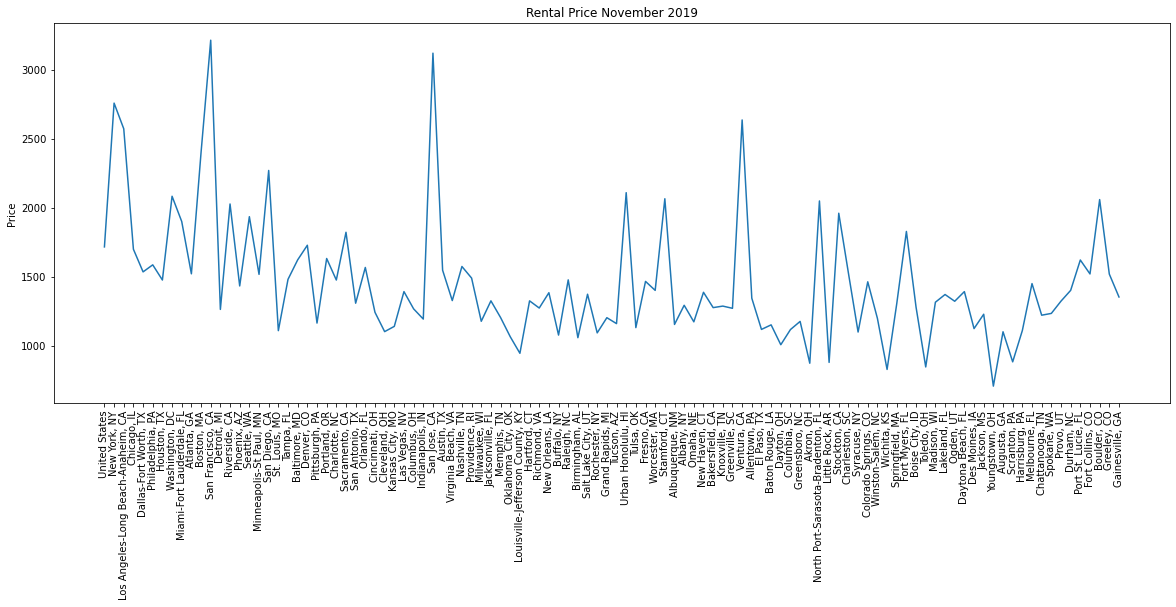

In [9]:
plt.figure(figsize=(20, 7))
plt.plot(rentals['RegionName'], rentals['2019-11'])
plt.title("Rental Price November 2019")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

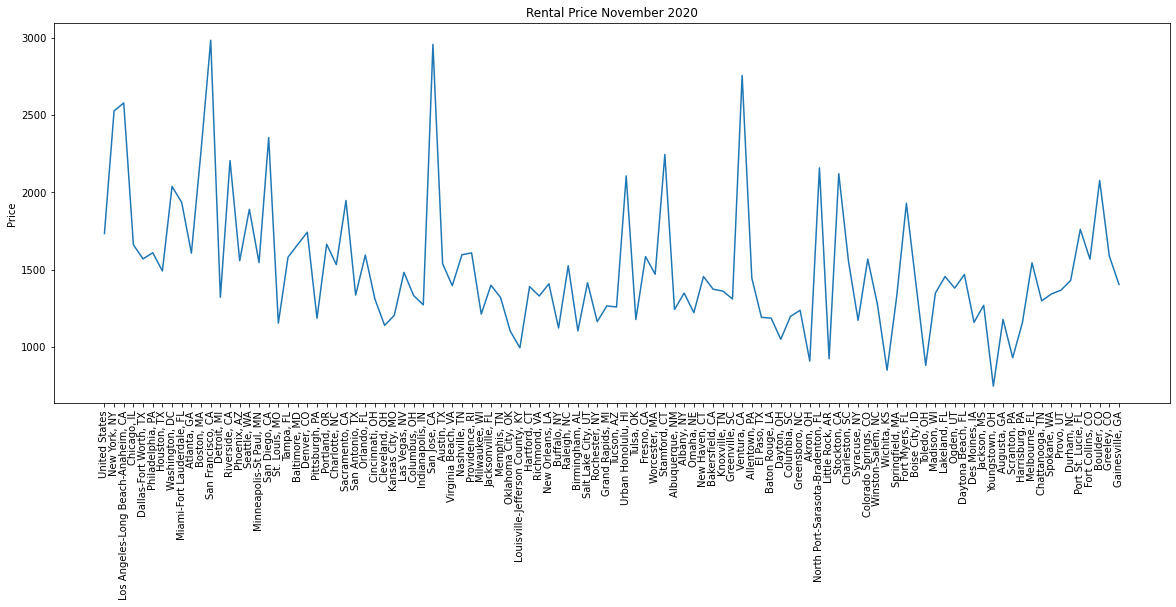

In [10]:
plt.figure(figsize=(20, 7))
plt.plot(rentals['RegionName'], rentals['2020-11'])
plt.title("Rental Price November 2020")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

### Feature Engineering

In [11]:
features_with_nan = [features for features in rentals.columns if rentals[features].isnull().sum() >= 1]
features_with_nan

['2014-01']

In [12]:
def replace_nan_values(df, features_nan):
    data = df.copy()
    for feature in features_nan:
        data[feature] = data[feature].fillna(data[feature].median())
    return data

In [13]:
df = replace_nan_values(rentals, features_with_nan)

In [14]:
df.isnull().sum()

RegionID      0
RegionName    0
SizeRank      0
2014-01       0
2014-02       0
2014-03       0
2014-04       0
2014-05       0
2014-06       0
2014-07       0
2014-08       0
2014-09       0
2014-10       0
2014-11       0
2014-12       0
2015-01       0
2015-02       0
2015-03       0
2015-04       0
2015-05       0
2015-06       0
2015-07       0
2015-08       0
2015-09       0
2015-10       0
2015-11       0
2015-12       0
2016-01       0
2016-02       0
2016-03       0
2016-04       0
2016-05       0
2016-06       0
2016-07       0
2016-08       0
2016-09       0
2016-10       0
2016-11       0
2016-12       0
2017-01       0
2017-02       0
2017-03       0
2017-04       0
2017-05       0
2017-06       0
2017-07       0
2017-08       0
2017-09       0
2017-10       0
2017-11       0
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
2018-05       0
2018-06       0
2018-07       0
2018-08       0
2018-09       0
2018-10       0
2018-11       0
2018-12 

In [15]:
len(df["SizeRank"].unique())

106

In [16]:
# remove duplicate features 
df2 = df.drop(columns=["RegionID", "SizeRank"])

In [17]:
melt = df2.melt(id_vars='RegionName', var_name='MonthYear', value_name='Price')

In [18]:
melt = melt.sort_values(['MonthYear', 'RegionName']).reset_index()
melt.drop(columns=["index"], inplace=True)
melt.head()

RegionName MonthYear   Price
0        Akron, OH   2014-01   744.0
1       Albany, NY   2014-01  1110.0
2  Albuquerque, NM   2014-01   977.0
3    Allentown, PA   2014-01  1063.0
4      Atlanta, GA   2014-01  1123.0

In [19]:
print(melt.shape)
melt.tail()

(8798, 3)


RegionName MonthYear   Price
8793     Washington, DC   2020-11  2039.0
8794        Wichita, KS   2020-11   850.0
8795  Winston-Salem, NC   2020-11  1277.0
8796      Worcester, MA   2020-11  1471.0
8797     Youngstown, OH   2020-11   747.0

In [20]:
# extract date features (month, year)
melt2 = melt.copy()
melt2["Month"] = pd.to_datetime(melt["MonthYear"]).dt.month
melt2["Year"] = pd.to_datetime(melt["MonthYear"]).dt.year
melt2.head()

RegionName MonthYear   Price  Month  Year
0        Akron, OH   2014-01   744.0      1  2014
1       Albany, NY   2014-01  1110.0      1  2014
2  Albuquerque, NM   2014-01   977.0      1  2014
3    Allentown, PA   2014-01  1063.0      1  2014
4      Atlanta, GA   2014-01  1123.0      1  2014

In [21]:
splitted = melt2["RegionName"].apply(lambda x: x.split(", "))
city = splitted.apply(lambda x: x[0])
state = splitted.apply(lambda x: x[-1])
result = pd.DataFrame(zip(city, state), columns=["City", "State"])
result

City State
0             Akron    OH
1            Albany    NY
2       Albuquerque    NM
3         Allentown    PA
4           Atlanta    GA
...             ...   ...
8793     Washington    DC
8794        Wichita    KS
8795  Winston-Salem    NC
8796      Worcester    MA
8797     Youngstown    OH

[8798 rows x 2 columns]

In [22]:
# concatenate data 
conc_data = pd.concat([melt2, result], axis=1, join="inner")
conc_data.drop(columns=["RegionName"], inplace=True)

In [23]:
conc_data.head()

MonthYear   Price  Month  Year         City State
0   2014-01   744.0      1  2014        Akron    OH
1   2014-01  1110.0      1  2014       Albany    NY
2   2014-01   977.0      1  2014  Albuquerque    NM
3   2014-01  1063.0      1  2014    Allentown    PA
4   2014-01  1123.0      1  2014      Atlanta    GA

In [24]:
conc_data.drop(columns=["MonthYear"], inplace=True)
conc_data.head()

Price  Month  Year         City State
0   744.0      1  2014        Akron    OH
1  1110.0      1  2014       Albany    NY
2   977.0      1  2014  Albuquerque    NM
3  1063.0      1  2014    Allentown    PA
4  1123.0      1  2014      Atlanta    GA

In [25]:
len(conc_data.State.unique())

41

In [205]:
conc_data = conc_data[conc_data['City'] != "United States"]

In [207]:
# encode categorical variables (States)
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(handle_unknown='ignore')

enc_col = pd.DataFrame({"State":conc_data["State"]})

encoded = enc.fit_transform(enc_col)

In [208]:
enc.categories_

[array(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'HI', 'IA',
        'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO',
        'MS', 'NC', 'NE', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI',
        'SC', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI'], dtype=object)]

In [209]:
joblib.dump(enc, open('encoder.joblib', 'wb'))

In [210]:
conc_data["Encoded_States"] = encoded

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [211]:
conc_data.head()

Price  Month  Year         City State  Encoded_States
0   744.0      1  2014        Akron    OH            28.0
1  1110.0      1  2014       Albany    NY            27.0
2   977.0      1  2014  Albuquerque    NM            25.0
3  1063.0      1  2014    Allentown    PA            31.0
4  1123.0      1  2014      Atlanta    GA             8.0

In [212]:
cities = {
    "Los Angeles-Long Beach-Anaheim": "Los Angeles",
    "North Port-Sarasota-Bradenton": "North Port",
    "Minneapolis-St Paul": "Minneapolis",
    "Miami-Fort Lauderdale": "Miami",
    "Louisville-Jefferson County": "Louisville",
    "Dallas-Fort Worth": "Dallas"
}

conc_data['City'] = conc_data['City'].map(cities).fillna(conc_data['City'])

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [213]:
conc_data["City"][:100]

0                 Akron
1                Albany
2           Albuquerque
3             Allentown
4               Atlanta
5               Augusta
6                Austin
7           Bakersfield
8             Baltimore
9           Baton Rouge
10           Birmingham
11           Boise City
12               Boston
13              Boulder
14              Buffalo
15           Charleston
16            Charlotte
17          Chattanooga
18              Chicago
19           Cincinnati
20            Cleveland
21     Colorado Springs
22             Columbia
23             Columbus
24               Dallas
25               Dayton
26        Daytona Beach
27               Denver
28           Des Moines
29              Detroit
30               Durham
31              El Paso
32         Fort Collins
33           Fort Myers
34               Fresno
35          Gainesville
36         Grand Rapids
37              Greeley
38           Greensboro
39           Greenville
40           Harrisburg
41             H

In [214]:
# get dummy variables for cities
dum_data = pd.get_dummies(conc_data, prefix=[""], prefix_sep="", columns=["City"], drop_first=False)

In [215]:
print(dum_data.shape)
dum_data.head()

(8715, 110)


Price  Month  Year State  Encoded_States  Akron  Albany  Albuquerque  \
0   744.0      1  2014    OH            28.0      1       0            0   
1  1110.0      1  2014    NY            27.0      0       1            0   
2   977.0      1  2014    NM            25.0      0       0            1   
3  1063.0      1  2014    PA            31.0      0       0            0   
4  1123.0      1  2014    GA             8.0      0       0            0   

   Allentown  Atlanta  Augusta  Austin  Bakersfield  Baltimore  Baton Rouge  \
0          0        0        0       0            0          0            0   
1          0        0        0       0            0          0            0   
2          0        0        0       0            0          0            0   
3          1        0        0       0            0          0            0   
4          0        1        0       0            0          0            0   

   Birmingham  Boise City  Boston  Boulder  Buffalo  Charleston  Charlotte  \
0           0           0       0        0        0           0          0   
1           0           0       0        0        0           0          0   
2           0           0       0        0        0           0          0   
3           0           0       0        0        0           0          0   
4           0           0       0        0        0           0          0   

   Chattanooga  Chicago  Cincinnati  Cleveland  Colorado Springs  Columbia  \
0            0        0           0          0                 0         0   
1            0        0           0          0                 0         0   
2            0        0           0          0                 0         0   
3            0        0           0          0                 0         0   
4            0        0           0          0                 0         0   

   Columbus  Dallas  Dayton  Daytona Beach  Denver  Des Moines  Detroit  \
0         0       0       0              0       0           0        0   
1         0       0       0              0       0           0        0   
2         0       0       0              0       0           0        0   
3         0       0       0              0       0           0        0   
4         0       0       0              0       0           0        0   

   Durham  El Paso  Fort Collins  Fort Myers  Fresno  Gainesville  \
0       0        0             0           0       0            0   
1       0        0             0           0       0            0   
2       0        0             0           0       0            0   
3       0        0             0           0       0            0   
4       0        0             0           0       0            0   

   Grand Rapids  Greeley  Greensboro  Greenville  Harrisburg  Hartford  \
0             0        0           0           0           0         0   
1             0        0           0           0           0         0   
2             0        0           0           0           0         0   
3             0        0           0           0           0         0   
4             0        0           0           0           0         0   

   Houston  Indianapolis  Jackson  Jacksonville  Kansas City  Knoxville  \
0        0             0        0             0            0          0   
1        0             0        0             0            0          0   
2        0             0        0             0            0          0   
3        0             0        0             0            0          0   
4        0             0        0             0            0          0   

   Lakeland  Las Vegas  Little Rock  Los Angeles  Louisville  Madison  \
0         0          0            0            0           0        0   
1         0          0            0            0           0        0   
2         0          0            0            0           0        0   
3         0          0            0            0           0        0   
4      

In [216]:
dum_data.drop(columns=['State'], inplace=True)

In [217]:
print(dum_data.shape)
dum_data.head()

(8715, 109)


Price  Month  Year  Encoded_States  Akron  Albany  Albuquerque  Allentown  \
0   744.0      1  2014            28.0      1       0            0          0   
1  1110.0      1  2014            27.0      0       1            0          0   
2   977.0      1  2014            25.0      0       0            1          0   
3  1063.0      1  2014            31.0      0       0            0          1   
4  1123.0      1  2014             8.0      0       0            0          0   

   Atlanta  Augusta  Austin  Bakersfield  Baltimore  Baton Rouge  Birmingham  \
0        0        0       0            0          0            0           0   
1        0        0       0            0          0            0           0   
2        0        0       0            0          0            0           0   
3        0        0       0            0          0            0           0   
4        1        0       0            0          0            0           0   

   Boise City  Boston  Boulder  Buffalo  Charleston  Charlotte  Chattanooga  \
0           0       0        0        0           0          0            0   
1           0       0        0        0           0          0            0   
2           0       0        0        0           0          0            0   
3           0       0        0        0           0          0            0   
4           0       0        0        0           0          0            0   

   Chicago  Cincinnati  Cleveland  Colorado Springs  Columbia  Columbus  \
0        0           0          0                 0         0         0   
1        0           0          0                 0         0         0   
2        0           0          0                 0         0         0   
3        0           0          0                 0         0         0   
4        0           0          0                 0         0         0   

   Dallas  Dayton  Daytona Beach  Denver  Des Moines  Detroit  Durham  \
0       0       0              0       0           0        0       0   
1       0       0              0       0           0        0       0   
2       0       0              0       0           0        0       0   
3       0       0              0       0           0        0       0   
4       0       0              0       0           0        0       0   

   El Paso  Fort Collins  Fort Myers  Fresno  Gainesville  Grand Rapids  \
0        0             0           0       0            0             0   
1        0             0           0       0            0             0   
2        0             0           0       0            0             0   
3        0             0           0       0            0             0   
4        0             0           0       0            0             0   

   Greeley  Greensboro  Greenville  Harrisburg  Hartford  Houston  \
0        0           0           0           0         0        0   
1        0           0           0           0         0        0   
2        0           0           0           0         0        0   
3        0           0           0           0         0        0   
4        0           0           0           0         0        0   

   Indianapolis  Jackson  Jacksonville  Kansas City  Knoxville  Lakeland  \
0             0        0             0            0          0         0   
1             0        0             0            0          0         0   
2             0        0             0            0          0         0   
3             0        0             0            0          0         0   
4             0        0             0            0          0         0   

   Las Vegas  Little Rock  Los Angeles  Louisville  Madison  Melbourne  \
0          0            0            0           0        0          0   
1          0            0            0           0        0          0   
2          0            0            0           0        0          0   
3          0            0            0           0  

In [218]:
dum_data.tail()

Price  Month  Year  Encoded_States  Akron  Albany  Albuquerque  \
8793  2039.0     11  2020             6.0      0       0            0   
8794   850.0     11  2020            14.0      0       0            0   
8795  1277.0     11  2020            23.0      0       0            0   
8796  1471.0     11  2020            17.0      0       0            0   
8797   747.0     11  2020            28.0      0       0            0   

      Allentown  Atlanta  Augusta  Austin  Bakersfield  Baltimore  \
8793          0        0        0       0            0          0   
8794          0        0        0       0            0          0   
8795          0        0        0       0            0          0   
8796          0        0        0       0            0          0   
8797          0        0        0       0            0          0   

      Baton Rouge  Birmingham  Boise City  Boston  Boulder  Buffalo  \
8793            0           0           0       0        0        0   
8794            0           0           0       0        0        0   
8795            0           0           0       0        0        0   
8796            0           0           0       0        0        0   
8797            0           0           0       0        0        0   

      Charleston  Charlotte  Chattanooga  Chicago  Cincinnati  Cleveland  \
8793           0          0            0        0           0          0   
8794           0          0            0        0           0          0   
8795           0          0            0        0           0          0   
8796           0          0            0        0           0          0   
8797           0          0            0        0           0          0   

      Colorado Springs  Columbia  Columbus  Dallas  Dayton  Daytona Beach  \
8793                 0         0         0       0       0              0   
8794                 0         0         0       0       0              0   
8795                 0         0         0       0       0              0   
8796                 0         0         0       0       0              0   
8797                 0         0         0       0       0              0   

      Denver  Des Moines  Detroit  Durham  El Paso  Fort Collins  Fort Myers  \
8793       0           0        0       0        0             0           0   
8794       0           0        0       0        0             0           0   
8795       0           0        0       0        0             0           0   
8796       0           0        0       0        0             0           0   
8797       0           0        0       0        0             0           0   

      Fresno  Gainesville  Grand Rapids  Greeley  Greensboro  Greenville  \
8793       0            0             0        0           0           0   
8794       0            0             0        0           0           0   
8795       0            0             0        0           0           0   
8796       0            0             0        0           0           0   
8797       0            0             0        0           0           0   

      Harrisburg  Hartford  Houston  Indianapolis  Jackson  Jacksonville  \
8793           0         0        0             0        0             0   
8794           0         0        0             0        0             0   
8795           0         0        0             0        0             0   
8796           0         0        0             0        0             0   
8797           0         0        0             0        0             0   

      Kansas City  Knoxville  Lakeland  Las Vegas  Little Rock  Los Angeles  \
8793            0          0         0          0            0            0   
8794            0          0         0          0            0            0   
8795            0          0         0          0            0            0   
8796            0          0         0          0            0            0   
8797            

### Preparing data for the model

#### Multiple linear regression

In [219]:
# split the data in train / val / test
training_size = int(len(dum_data)*0.5)
val_size = int(len(dum_data)*0.25)
test_size = len(dum_data) - (training_size + val_size)
training_size, val_size, test_size

(4357, 2178, 2180)

In [222]:
# Train test split train, corresponding index 0-6534, test 6535-8715
train, test = dum_data[0:(training_size+val_size)], dum_data[(training_size+val_size):len(dum_data)]
train.shape, test.shape

((6535, 109), (2180, 109))

In [223]:
# train validation split (splitting train set again to get validation set) tr 0-4356, val 4357-6535
tr, val = train[0:training_size], train[training_size:len(train)]
tr.shape, val.shape

((4357, 109), (2178, 109))

In [224]:
# Separate x features and y value

X_train, y_train = train.drop(columns=["Price"]), train["Price"]

X_tr, y_tr = tr.drop(columns=["Price"]), tr["Price"]

X_val, y_val = val.drop(columns=["Price"]), val["Price"]

X_test, y_test = test.drop(columns=["Price"]), test["Price"]

In [266]:
X_tr.shape, y_tr.shape

((4357, 108), (4357,))

In [226]:
# Multiple Linear Regression method

In [227]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# fit the model
lr.fit(X_tr, y_tr)

LinearRegression()

In [228]:
# add a constant column so our model will produce an estimate of regression coefficient for the intercept
X2 = sm.add_constant(X_tr)
X2

const  Month  Year  Encoded_States  Akron  Albany  Albuquerque  \
0       1.0      1  2014            28.0      1       0            0   
1       1.0      1  2014            27.0      0       1            0   
2       1.0      1  2014            25.0      0       0            1   
3       1.0      1  2014            31.0      0       0            0   
4       1.0      1  2014             8.0      0       0            0   
...     ...    ...   ...             ...    ...     ...          ...   
4393    1.0      6  2017            34.0      0       0            0   
4394    1.0      6  2017             7.0      0       0            0   
4395    1.0      6  2017            26.0      0       0            0   
4396    1.0      6  2017             1.0      0       0            0   
4397    1.0      6  2017             3.0      0       0            0   

      Allentown  Atlanta  Augusta  Austin  Bakersfield  Baltimore  \
0             0        0        0       0            0          0   
1             0        0        0       0            0          0   
2             0        0        0       0            0          0   
3             1        0        0       0            0          0   
4             0        1        0       0            0          0   
...         ...      ...      ...     ...          ...        ...   
4393          0        0        0       0            0          0   
4394          0        0        0       0            0          0   
4395          0        0        0       0            0          0   
4396          0        0        0       0            0          0   
4397          0        0        0       0            0          0   

      Baton Rouge  Birmingham  Boise City  Boston  Boulder  Buffalo  \
0               0           0           0       0        0        0   
1               0           0           0       0        0        0   
2               0           0           0       0        0        0   
3               0           0           0       0        0        0   
4               0           0           0       0        0        0   
...           ...         ...         ...     ...      ...      ...   
4393            0           0           0       0        0        0   
4394            0           0           0       0        0        0   
4395            0           0           0       0        0        0   
4396            0           0           0       0        0        0   
4397            0           0           0       0        0        0   

      Charleston  Charlotte  Chattanooga  Chicago  Cincinnati  Cleveland  \
0              0          0            0        0           0          0   
1              0          0            0        0           0          0   
2              0          0            0        0           0          0   
3              0          0            0        0           0          0   
4              0          0            0        0           0          0   
...          ...        ...          ...      ...         ...        ...   
4393           0          0            0        0           0          0   
4394           0          0            0        0           0          0   
4395           0          0            0        0           0          0   
4396           0          0            0        0           0          0   
4397           0          0            0        0           0          0   

      Colorado Springs  Columbia  Columbus  Dallas  Dayton  Daytona Beach  \
0                    0         0         0       0       0              0   
1                    0         0         0       0       0              0   
2                    0         0         0       0       0              0   
3                    0         0         0       0       0              0   
4                    0         0         0       0       0              0   
...                ...       ...       ...     ...     ...            ...   
4393   

In [229]:
# refit regression model using sm to get regression coefficients
est = sm.OLS(y_tr, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     3195.
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:46:03   Log-Likelihood:                -22611.
No. Observations:                4357   AIC:                         4.544e+04
Df Residuals:                    4250   BIC:                         4.612e+04
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.005e+05   1305.488  

In [230]:
y_val_pred = lr.predict(X_val)

In [231]:
y_val_pred

array([ 931.56037897, 1277.12135458, 1217.68233019, ..., 1172.68731117,
       1266.63969212, 1497.90159689])

In [232]:
# Check the quality of regression model use metrics R2, MAE, RMSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

R2 = r2_score(y_val, y_val_pred)
MAE = mean_absolute_error(y_val, y_val_pred)
RMSE = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"R2 score: {R2}")
print(f"MAE : {MAE}")
print(f"RMSE : {RMSE}")

R2 score: 0.9704220173423644
MAE : 60.80670726689285
RMSE : 75.09137182837102


In [233]:
# Linear regression without month column to see if we are overfitting
X_tr_no_month = X_tr.drop(columns=["Month"])
X_val_no_month = X_val.drop(columns=["Month"])

In [234]:
lr.fit(X_tr_no_month, y_tr)

LinearRegression()

In [235]:
# get the regression results that include the coefficients and p-values
X2 = sm.add_constant(X_tr_no_month)
est = sm.OLS(y_tr, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     2804.
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:46:35   Log-Likelihood:                -22912.
No. Observations:                4357   AIC:                         4.604e+04
Df Residuals:                    4251   BIC:                         4.671e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.351e+04   1366.895  

In [236]:
y_val_pred = lr.predict(X_val_no_month)

In [237]:
R2 = r2_score(y_val, y_val_pred)
MAE = mean_absolute_error(y_val, y_val_pred)
RMSE = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"R2 score: {R2}")
print(f"MAE : {MAE}")
print(f"RMSE : {RMSE}")

R2 score: 0.97011640882406
MAE : 59.03841409254118
RMSE : 75.47830811095176


#### Retrain the model using full train set and apply our first and second model to see wchich one performs better

In [250]:
lr.fit(X_train, y_train)

LinearRegression()

In [239]:
# add a constant column so our model will produce an estimate of regression coefficient for the intercept
const = sm.add_constant(X_train)
const

const  Month  Year  Encoded_States  Akron  Albany  Albuquerque  \
0       1.0      1  2014            28.0      1       0            0   
1       1.0      1  2014            27.0      0       1            0   
2       1.0      1  2014            25.0      0       0            1   
3       1.0      1  2014            31.0      0       0            0   
4       1.0      1  2014             8.0      0       0            0   
...     ...    ...   ...             ...    ...     ...          ...   
6592    1.0      3  2019            28.0      0       0            0   
6593    1.0      3  2019             4.0      0       0            0   
6594    1.0      3  2019            33.0      0       0            0   
6595    1.0      3  2019            28.0      0       0            0   
6596    1.0      3  2019            35.0      0       0            0   

      Allentown  Atlanta  Augusta  Austin  Bakersfield  Baltimore  \
0             0        0        0       0            0          0   
1             0        0        0       0            0          0   
2             0        0        0       0            0          0   
3             1        0        0       0            0          0   
4             0        1        0       0            0          0   
...         ...      ...      ...     ...          ...        ...   
6592          0        0        0       0            0          0   
6593          0        0        0       0            0          0   
6594          0        0        0       0            0          0   
6595          0        0        0       0            0          0   
6596          0        0        0       0            0          0   

      Baton Rouge  Birmingham  Boise City  Boston  Boulder  Buffalo  \
0               0           0           0       0        0        0   
1               0           0           0       0        0        0   
2               0           0           0       0        0        0   
3               0           0           0       0        0        0   
4               0           0           0       0        0        0   
...           ...         ...         ...     ...      ...      ...   
6592            0           0           0       0        0        0   
6593            0           0           0       0        0        0   
6594            0           0           0       0        0        0   
6595            0           0           0       0        0        0   
6596            0           0           0       0        0        0   

      Charleston  Charlotte  Chattanooga  Chicago  Cincinnati  Cleveland  \
0              0          0            0        0           0          0   
1              0          0            0        0           0          0   
2              0          0            0        0           0          0   
3              0          0            0        0           0          0   
4              0          0            0        0           0          0   
...          ...        ...          ...      ...         ...        ...   
6592           0          0            0        0           0          1   
6593           0          0            0        0           0          0   
6594           0          0            0        0           0          0   
6595           0          0            0        0           0          0   
6596           0          0            0        0           0          0   

      Colorado Springs  Columbia  Columbus  Dallas  Dayton  Daytona Beach  \
0                    0         0         0       0       0              0   
1                    0         0         0       0       0              0   
2                    0         0         0       0       0              0   
3                    0         0         0       0       0              0   
4                    0         0         0       0       0              0   
...                ...       ...       ...     ...     ...            ...   
6592   

In [240]:
est = sm.OLS(y_train, const)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     4005.
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:46:52   Log-Likelihood:                -34852.
No. Observations:                6535   AIC:                         6.992e+04
Df Residuals:                    6428   BIC:                         7.064e+04
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.356e+04    819.276  

In [251]:
y_pred = lr.predict(X_test)

In [252]:
display= pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
display.sort_index()

Actual    Predicted
6597   966.0  1011.034263
6598  1369.0  1309.211682
6599  1703.0  1654.131037
6600  1088.0  1191.066521
6601  1236.0  1263.098779
...      ...          ...
8793  2039.0  2171.806317
8794   850.0  1002.032124
8795  1277.0  1274.612769
8796  1471.0  1385.741801
8797   747.0   871.048253

[2180 rows x 2 columns]

In [253]:
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 score: {R2}")
print(f"MAE : {MAE}")
print(f"RMSE : {RMSE}")

R2 score: 0.9682622067239048
MAE : 63.9236480577212
RMSE : 80.0948083257798


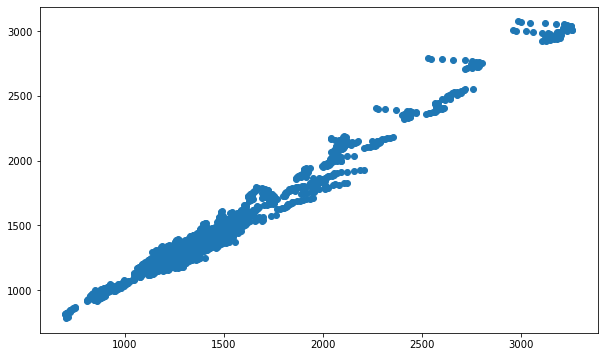

In [254]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.show()

In [245]:
# try witout month
X_train_no_month = X_train.drop(columns=["Month"])
X_test_no_month = X_test.drop(columns=["Month"])

In [246]:
lr.fit(X_train_no_month, y_train)

LinearRegression()

In [247]:
const = sm.add_constant(X_train_no_month)
est = sm.OLS(y_train, const)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     3672.
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:47:11   Log-Likelihood:                -35163.
No. Observations:                6535   AIC:                         7.054e+04
Df Residuals:                    6429   BIC:                         7.126e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.155e+04    854.991  

In [248]:
y_pred = lr.predict(X_test_no_month)

In [249]:
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 score: {R2}")
print(f"MAE : {MAE}")
print(f"RMSE : {RMSE}")

R2 score: 0.9675985811009329
MAE : 64.03075855807911
RMSE : 80.92785273165183


### According to our computations the first model that includes all features performed better with the r2 score of 96%

In [255]:
from datetime import datetime, timedelta
from dateutil.relativedelta import *
import json

def rentalPricePredict(city, state=None):
    now = datetime.today()
    month_3 = now + relativedelta(months=+3)
    month_6 = now + relativedelta(months=+6)
    month_12 = now + relativedelta(months=+12)
    # create df based on data provided
    df0 = pd.DataFrame(data={"Month": now.month, "Year": now.year, "City": city}, index=[0])
    
    df1 = pd.DataFrame(data={"Month": month_3.month, "Year": month_3.year, "City": city}, index=[0])
    
    df2 = pd.DataFrame(data={"Month": month_6.month, "Year": month_6.year, "City": city}, index=[0])
    
    df3 = pd.DataFrame(data={"Month": month_12.month, "Year": month_12.year, "City": city}, index=[0])
    
#     # create dummy variables for city
    dum_data0 = pd.get_dummies(df0, prefix=[""], prefix_sep="", columns=["City"], drop_first=False)
    dum_data1 = pd.get_dummies(df1, prefix=[""], prefix_sep="", columns=["City"], drop_first=False)
    dum_data2 = pd.get_dummies(df2, prefix=[""], prefix_sep="", columns=["City"], drop_first=False)
    dum_data3 = pd.get_dummies(df3, prefix=[""], prefix_sep="", columns=["City"], drop_first=False)
    # encode state variable
    if state != None:
        encoded_state = enc.transform([[state]])
        dum_data0["Encoded_States"] = encoded_state
        dum_data1["Encoded_States"] = encoded_state
        dum_data2["Encoded_States"] = encoded_state
        dum_data3["Encoded_States"] = encoded_state

    # get missing columns
    X_test = test.drop(columns=['Price'], axis=1)
    missing_cols = set(X_test.columns) - set(dum_data1.columns)
    for c in missing_cols:
        dum_data0[c] = 0
        dum_data1[c] = 0
        dum_data2[c] = 0
        dum_data3[c] = 0
        
    # Ensure the order of column in the test set is in the same order than in train set
    dum_data0 = dum_data0[X_test.columns]
    dum_data1 = dum_data1[X_test.columns]
    dum_data2 = dum_data2[X_test.columns]
    dum_data3 = dum_data3[X_test.columns]
    
    pred0 = float(lr.predict(dum_data0)[0])
    pred1 = float(lr.predict(dum_data1)[0])
    pred2 = float(lr.predict(dum_data2)[0])
    pred3 = float(lr.predict(dum_data3)[0])
    
    sub = test[(test[city] == 1) & (test["Year"] == 2020)]
    date_col = pd.to_datetime(sub[['Year', 'Month']].assign(DAY=1))
    sub["date"] = date_col.apply(lambda x: x.date().strftime("%Y-%m-%d"))
    sub.index = pd.RangeIndex(start=1, stop=12, step=1)
    last_year_price = sub[["date", "Price"]].to_dict(orient="index")
    
    pred_data = pd.DataFrame({"date": [now.date(), month_3.date(), month_6.date(), month_12.date()],
                         "Price": [pred0, pred1, pred2, pred3]})
    
    a = {"city": city, "price": { "historical": last_year_price,
                                  "today": {"price": pred0, "date": str(now.date())},
                                  "forecast_3": { "price": pred1, "date": str(month_3.date()) }, 
                                  "forecast_6": { "price": pred2, "date": str(month_6.date()) },
                                  "forecast_12": { "price": pred3, "date": str(month_12.date())}}}
    return a

In [270]:
er = rentalPricePredict("Albany", "NY")

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [258]:
print(er)

{'city': 'Albany', 'price': {'historical': {1: {'date': '2020-01-01', 'Price': 1319.0}, 2: {'date': '2020-02-01', 'Price': 1305.0}, 3: {'date': '2020-03-01', 'Price': 1321.0}, 4: {'date': '2020-04-01', 'Price': 1327.0}, 5: {'date': '2020-05-01', 'Price': 1339.0}, 6: {'date': '2020-06-01', 'Price': 1331.0}, 7: {'date': '2020-07-01', 'Price': 1337.0}, 8: {'date': '2020-08-01', 'Price': 1345.0}, 9: {'date': '2020-09-01', 'Price': 1346.0}, 10: {'date': '2020-10-01', 'Price': 1345.0}, 11: {'date': '2020-11-01', 'Price': 1349.0}}, 'today': {'price': 1422.8798771092552, 'date': '2021-02-02'}, 'forecast_3': {'price': 1436.4630611528555, 'date': '2021-05-02'}, 'forecast_6': {'price': 1450.0462451964559, 'date': '2021-08-02'}, 'forecast_12': {'price': 1471.5430105138657, 'date': '2022-02-02'}}}


In [259]:
joblib.dump(lr, open('rental_model.joblib', 'wb'))

In [260]:
enci = joblib.load("encoder.joblib")

In [261]:
encoded_state = enci.transform([["OH"]])

In [262]:
encoded_state

array([[28.]])

In [273]:
test.reset_index(drop=True).to_csv("data/test.csv", index=False)

In [274]:
f = pd.read_csv("data/test.csv")

In [276]:
f

Price  Month  Year  Encoded_States  Akron  Albany  Albuquerque  \
0      966.0      3  2019            28.0      0       0            0   
1     1369.0      3  2019             7.0      0       0            0   
2     1703.0      3  2019             4.0      0       0            0   
3     1088.0      3  2019            10.0      0       0            0   
4     1236.0      3  2019            19.0      0       0            0   
...      ...    ...   ...             ...    ...     ...          ...   
2175  2039.0     11  2020             6.0      0       0            0   
2176   850.0     11  2020            14.0      0       0            0   
2177  1277.0     11  2020            23.0      0       0            0   
2178  1471.0     11  2020            17.0      0       0            0   
2179   747.0     11  2020            28.0      0       0            0   

      Allentown  Atlanta  Augusta  Austin  Bakersfield  Baltimore  \
0             0        0        0       0            0          0   
1             0        0        0       0            0          0   
2             0        0        0       0            0          0   
3             0        0        0       0            0          0   
4             0        0        0       0            0          0   
...         ...      ...      ...     ...          ...        ...   
2175          0        0        0       0            0          0   
2176          0        0        0       0            0          0   
2177          0        0        0       0            0          0   
2178          0        0        0       0            0          0   
2179          0        0        0       0            0          0   

      Baton Rouge  Birmingham  Boise City  Boston  Boulder  Buffalo  \
0               0           0           0       0        0        0   
1               0           0           0       0        0        0   
2               0           0           0       0        0        0   
3               0           0           0       0        0        0   
4               0           0           0       0        0        0   
...           ...         ...         ...     ...      ...      ...   
2175            0           0           0       0        0        0   
2176            0           0           0       0        0        0   
2177            0           0           0       0        0        0   
2178            0           0           0       0        0        0   
2179            0           0           0       0        0        0   

      Charleston  Charlotte  Chattanooga  Chicago  Cincinnati  Cleveland  \
0              0          0            0        0           0          0   
1              0          0            0        0           0          0   
2              0          0            0        0           0          0   
3              0          0            0        0           0          0   
4              0          0            0        0           0          0   
...          ...        ...          ...      ...         ...        ...   
2175           0          0            0        0           0          0   
2176           0          0            0        0           0          0   
2177           0          0            0        0           0          0   
2178           0          0            0        0           0          0   
2179           0          0            0        0           0          0   

      Colorado Springs  Columbia  Columbus  Dallas  Dayton  Daytona Beach  \
0                    0         0         0       0       1              0   
1                    0         0         0       0       0              1   
2                    0         0         0       0       0              0   
3                    0         0         0       0       0              0   
4                    0         0         0       0       0              0   
...                ...       ...       ...     ...     ...            ...